In [1]:
# Installation des packages
! pip install pandas numpy streamlit scikit-learn seaborn xgboost joblib

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl (11.6 MB)
  Using cached numpy-2.2.5-cp310-cp310-win_amd64.whl (12.9 MB)
     ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.9 MB 435.7 kB/s eta 0:00:23
     ---------------------------------------- 0.0/9.9 MB 435.7 kB/s eta 0:00:23
     ---------------------------------------- 0.1/9.9 MB 297.7 kB/s eta 0:00:33
     ---------------------------------------- 0.1/9.9 MB 374.1 kB/s eta 0:00:27
     ---------------------------------------- 0.1/9.9 MB 467.6 kB/s eta 0:00:21
     ---------------------------------------- 0.1/9.9 MB 379.3 kB/s eta 0:00:26
      --------------------------------------- 0.2/9.9 MB 541.9 kB/s eta 0:00:18
      --------------------------------------- 0.2/9.9 MB 600.7 kB/s eta 0:00:17
      -------


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


      --------------------------------------- 3.3/150.0 MB 5.6 MB/s eta 0:00:27
      --------------------------------------- 3.4/150.0 MB 5.5 MB/s eta 0:00:27
      --------------------------------------- 3.6/150.0 MB 5.3 MB/s eta 0:00:28
     - -------------------------------------- 4.0/150.0 MB 5.5 MB/s eta 0:00:27
     - -------------------------------------- 4.1/150.0 MB 5.4 MB/s eta 0:00:28
     - -------------------------------------- 4.4/150.0 MB 5.4 MB/s eta 0:00:27
     - -------------------------------------- 4.8/150.0 MB 5.5 MB/s eta 0:00:27
     - -------------------------------------- 5.0/150.0 MB 5.5 MB/s eta 0:00:27
     - -------------------------------------- 5.3/150.0 MB 5.6 MB/s eta 0:00:27
     - -------------------------------------- 5.6/150.0 MB 5.6 MB/s eta 0:00:26
     - -------------------------------------- 5.8/150.0 MB 5.6 MB/s eta 0:00:26
     - -------------------------------------- 5.8/150.0 MB 5.3 MB/s eta 0:00:28
     - ---------------------------------

In [11]:
# Importation des packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold 
import joblib 
from sklearn.tree import DecisionTreeClassifier



In [4]:
# Chargement des données
df_inclusion = pd.read_csv('Financial_inclusion_dataset.csv')
df_inclusion.head(4)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private


In [6]:
# Information sur les données
df_inclusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [16]:
# valeur uniques colonnes catégorielle
for col in df_inclusion.select_dtypes(include='object').columns:
    print(f"{col} : {df_inclusion[col].unique()}")

country : ['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
uniqueid : ['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
bank_account : ['Yes' 'No']
location_type : ['Rural' 'Urban']
cellphone_access : ['Yes' 'No']
gender_of_respondent : ['Female' 'Male']
relationship_with_head : ['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']
marital_status : ['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']
education_level : ['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA']
job_type : ['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income']


In [17]:
# statistiques descriptives colonnes catégorielles
df_inclusion.describe(include='object')

,country,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524,23524,23524,23524,23524,23524,23524,23524,23524
unique,4,8735,2,2,2,2,6,5,6,10
top,Rwanda,uniqueid_17,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,4,20212,14343,17454,13877,12831,10749,12791,6437


In [18]:
# statistiques descriptives colonnes numériques
df_inclusion.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [19]:
# colonnes dupliquées
df_inclusion.duplicated().sum()

np.int64(0)

In [20]:
# valeurs manquantes
df_inclusion.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [21]:
# remplacer les valeurs manquantes numériques par la mediane
col_numerique = df_inclusion.select_dtypes(exclude='object').columns
col_numerique

Index(['year', 'household_size', 'age_of_respondent'], dtype='object')

In [22]:
# Remplacer les valeurs manquantes par la mediane
for col in col_numerique:
    df_inclusion[col].fillna(df_inclusion[col].median(), inplace=True)


col_categorielle = df_inclusion.select_dtypes(include='object').columns.tolist()
for col in col_categorielle:
    df_inclusion[col].fillna(df_inclusion[col].mode()[0], inplace=True)

C:\Users\XPS 13\AppData\Local\Temp\ipykernel_17568\2084470841.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_inclusion[col].fillna(df_inclusion[col].median(), inplace=True)
C:\Users\XPS 13\AppData\Local\Temp\ipykernel_17568\2084470841.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [23]:
df_inclusion.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [24]:
# valeur aberrantes
# Gestion des valeurs abbérantes
# selection des colonnes numeriques
col_numeriques = list(df_inclusion.select_dtypes(include=["int64","float64"]).columns)

# Initialiser une liste pour stocker les colonnes avec valeurs aberrantes
colonnes_aberrantes = []

def valeurs_aberrantes(data, col_numeriques):
    # Définir le seuil pour identifier les valeurs aberrantes en fonction du score Z
    seuil_z = 3
    # Boucle à travers chaque colonne numérique
    for colonne in col_numeriques:
        # Calculer la moyenne et l'écart-type de la colonne actuelle
        moyenne = data[colonne].mean()
        ecart_type = data[colonne].std()

        # Calculer les scores Z pour la colonne actuelle
        scores_z = (data[colonne] - moyenne) / ecart_type

        # Identifier les valeurs aberrantes pour la colonne actuelle
        valeurs_aberrantes = data[abs(scores_z) > seuil_z]

        # Afficher les valeurs aberrantes pour la colonne actuelle
        if not valeurs_aberrantes.empty:
             colonnes_aberrantes.append(colonne)
             print(f"Voici les valeurs aberrantes dans la colonne '{colonne}' avec zscore = 3 :")
             for index, valeur in valeurs_aberrantes[colonne].items():
                print(f"Ligne: {index}, Valeur: {valeur}")
    print(f"\nIl y a {len(colonnes_aberrantes)} colonnes avec des valeurs aberrantes : {colonnes_aberrantes}")

valeurs_aberrantes(df_inclusion,col_numeriques)

Voici les valeurs aberrantes dans la colonne 'household_size' avec zscore = 3 :
Ligne: 58, Valeur: 11
Ligne: 348, Valeur: 12
Ligne: 372, Valeur: 16
Ligne: 507, Valeur: 11
Ligne: 674, Valeur: 12
Ligne: 879, Valeur: 11
Ligne: 931, Valeur: 11
Ligne: 1148, Valeur: 16
Ligne: 1403, Valeur: 11
Ligne: 1486, Valeur: 11
Ligne: 1493, Valeur: 15
Ligne: 1599, Valeur: 13
Ligne: 1893, Valeur: 11
Ligne: 1933, Valeur: 11
Ligne: 1999, Valeur: 11
Ligne: 2121, Valeur: 13
Ligne: 2207, Valeur: 12
Ligne: 2373, Valeur: 12
Ligne: 2436, Valeur: 12
Ligne: 2593, Valeur: 12
Ligne: 2599, Valeur: 11
Ligne: 2648, Valeur: 11
Ligne: 2879, Valeur: 11
Ligne: 2886, Valeur: 13
Ligne: 2911, Valeur: 13
Ligne: 2979, Valeur: 12
Ligne: 2988, Valeur: 12
Ligne: 3030, Valeur: 12
Ligne: 3044, Valeur: 11
Ligne: 3081, Valeur: 12
Ligne: 3086, Valeur: 13
Ligne: 3289, Valeur: 11
Ligne: 3370, Valeur: 11
Ligne: 3691, Valeur: 12
Ligne: 3770, Valeur: 11
Ligne: 3849, Valeur: 12
Ligne: 3912, Valeur: 13
Ligne: 3979, Valeur: 11
Ligne: 4045, Val

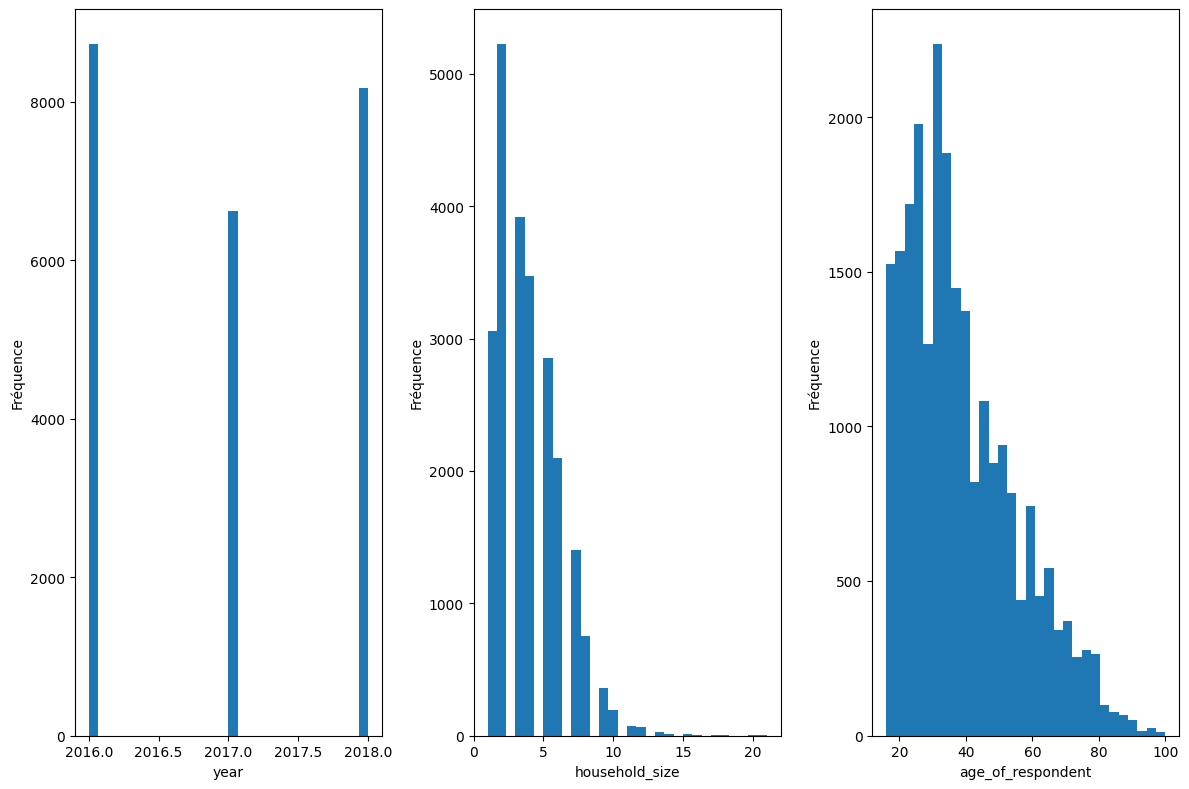

In [25]:
# analyse exploratoire
# Sélection des variables quantitatives
quant_vars = df_inclusion.select_dtypes(include=np.number).columns

# Définir le nombre de sous-graphiques nécessaires
num_vars = len(quant_vars)
num_rows = (num_vars // 3) + (num_vars % 3 > 0)  # Ajuste le nombre de lignes

# Création des subplots adaptés au nombre de variables
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(12, 8))

# Aplatir axs si nécessaire
axs = axs.flatten()

# Génération des histogrammes
for i, var in enumerate(quant_vars):
    axs[i].hist(df_inclusion[var], bins=30)
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Fréquence')

    # Cacher les subplots vides
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


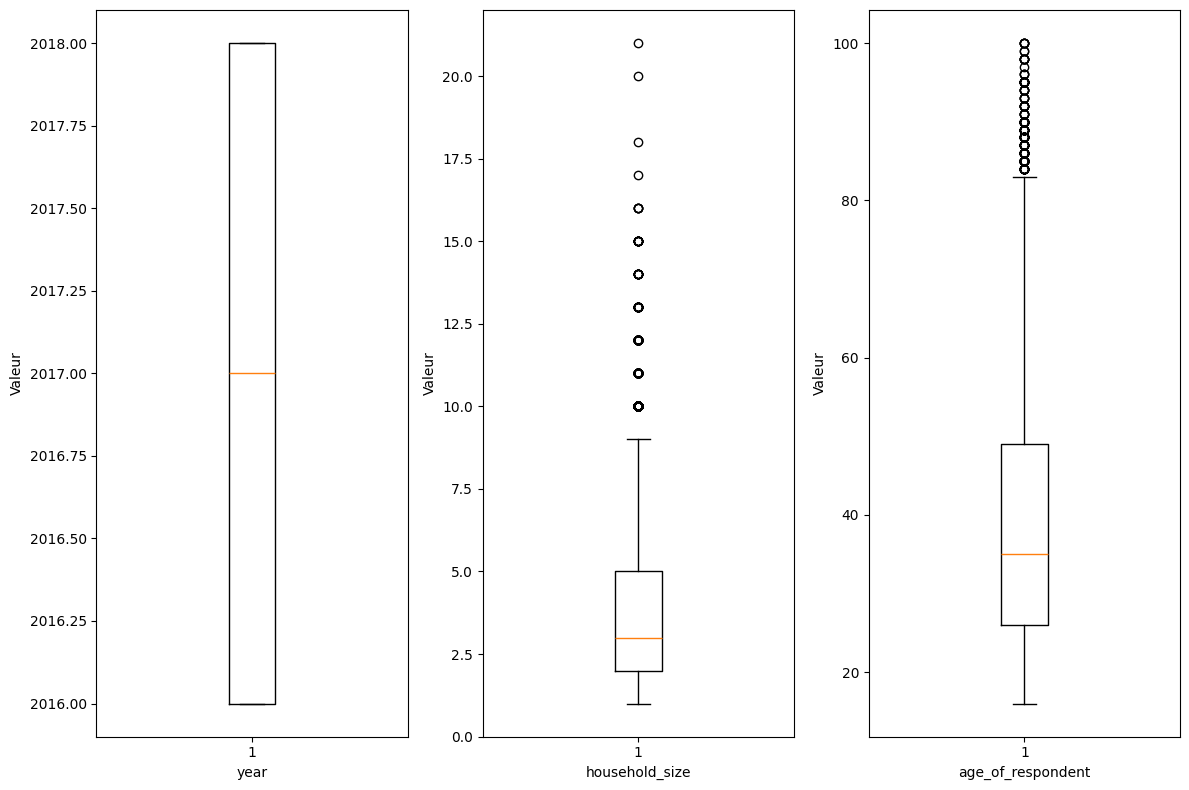

In [26]:
# Sélection des variables quantitatives
quant_vars = df_inclusion.select_dtypes(include=np.number).columns

# Définir dynamiquement le nombre de lignes nécessaires
num_vars = len(quant_vars)
num_rows = (num_vars // 3) + (num_vars % 3 > 0)  # Ajuste le nombre de lignes

# Création des subplots adaptés au nombre de variables
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(12, 8))

# Aplatir axs si nécessaire (cas où axs est une matrice)
axs = axs.flatten()

# Génération des boxplots
for i, var in enumerate(quant_vars):
    axs[i].boxplot(df_inclusion[var])
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Valeur')

    # Cacher les subplots vides
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()

plt.show()

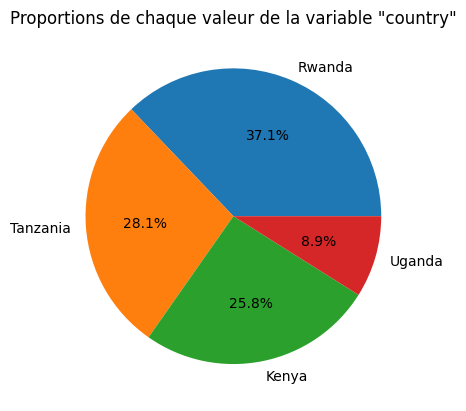

In [29]:
# Calcul des proportions pour chaque valeur de la variable catégorielle
prop_counts = df_inclusion['country'].value_counts(normalize=True)

# Création du pie chart
plt.pie(prop_counts, labels=prop_counts.index, autopct='%1.1f%%')
plt.title('Proportions de chaque valeur de la variable "country"')
plt.show()

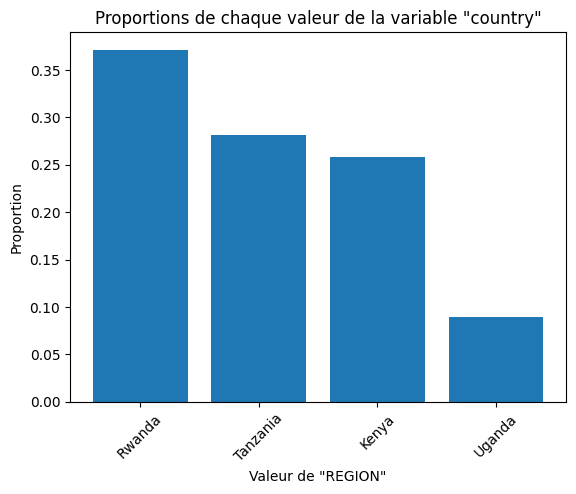

In [30]:
# Calcul des proportions pour chaque valeur de la variable catégorielle
prop_counts = df_inclusion['country'].value_counts(normalize=True)

# Création du barplot
plt.bar(x=prop_counts.index, height=prop_counts)
plt.xticks(rotation=45)
plt.xlabel('Valeur de "REGION"')
plt.ylabel('Proportion')
plt.title('Proportions de chaque valeur de la variable "country"')
plt.show()

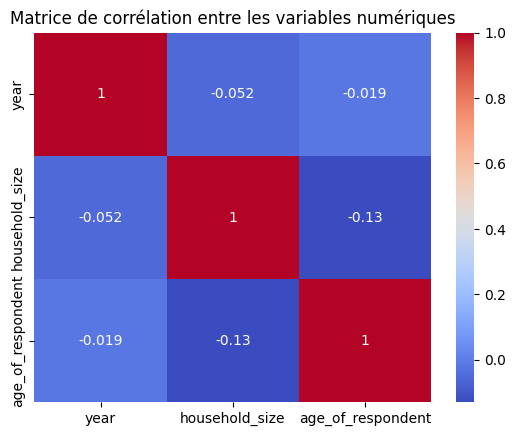

In [31]:
# Corrélation entre les variables numériques
corr_matrix = df_inclusion.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()

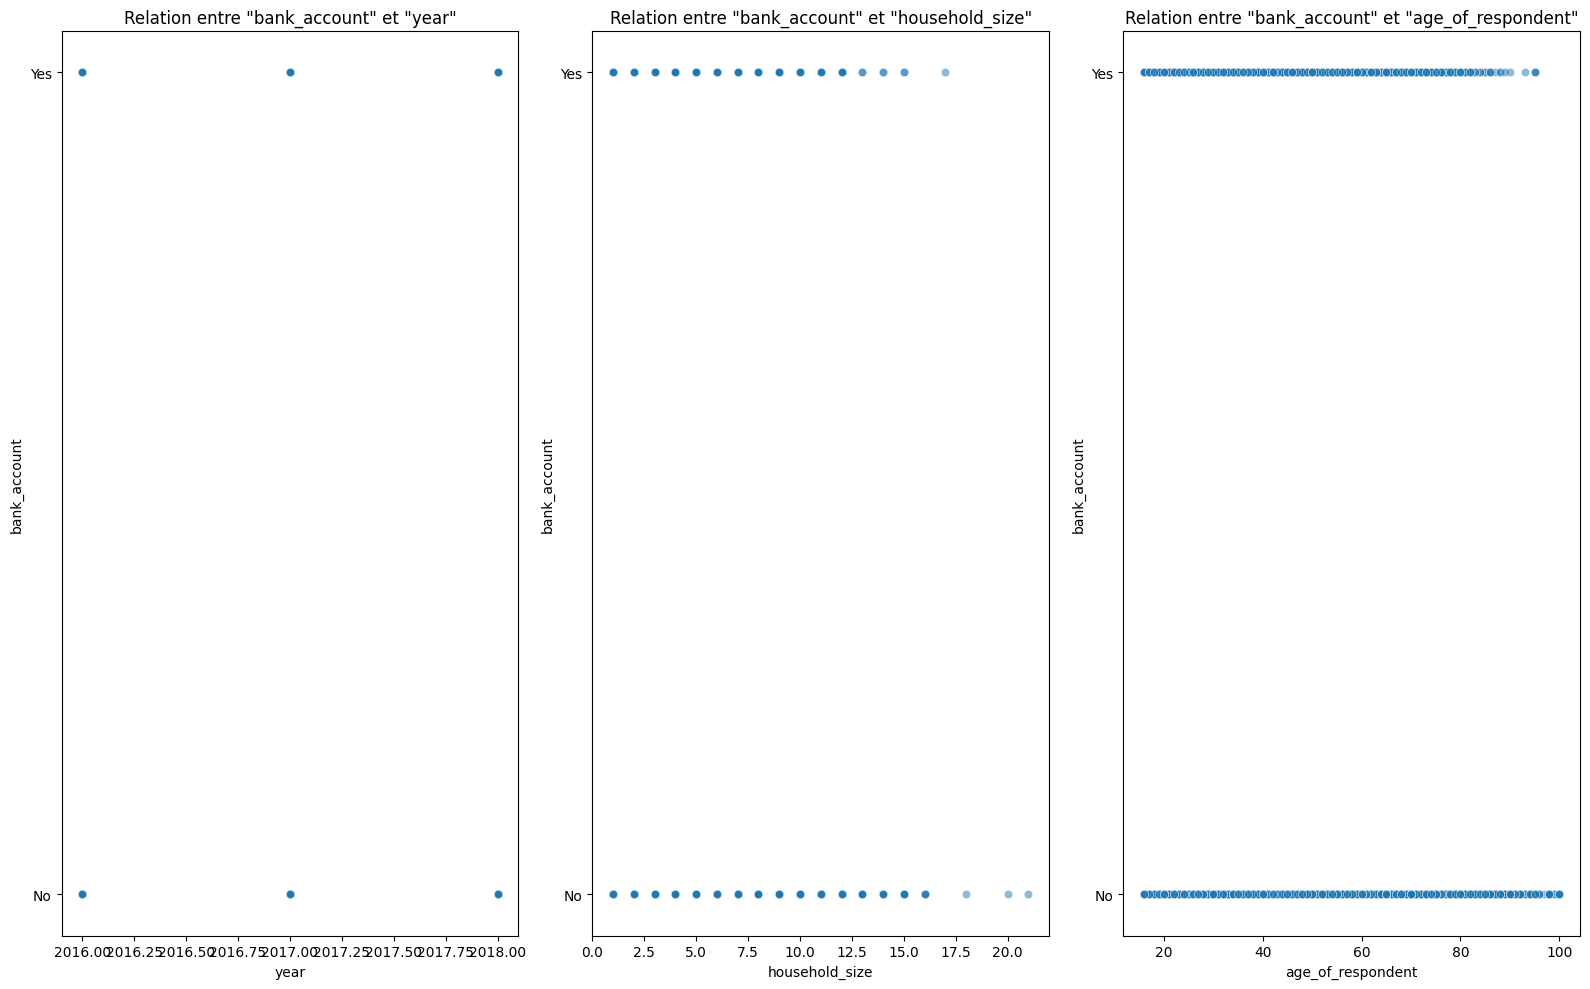

In [33]:
# Relation entre la variable cible 'churn' et les variables numériques
# Sélection des variables numériques
num_vars = df_inclusion.select_dtypes(include=np.number).columns

# Calcul de la taille de la matrice des subplots en fonction du nombre de variables numériques
n_cols = 3
n_rows = int(np.ceil(len(num_vars) / n_cols))

# Affichage des scatterplots pour chaque variable numérique sur une même figure avec des subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='bank_account', data=df_inclusion, alpha=0.5, ax=axs[i])
    axs[i].set_title('Relation entre "bank_account" et "{}"'.format(var))

# Ajout des titres et des étiquettes des axes
plt.tight_layout()
plt.show()

In [34]:
# encodage des variables catérgorielles avec le label encoder

# Identifier les colonnes catégorielles
cat_cols = df_inclusion.select_dtypes(include='object').columns

# Créer une instance de LabelEncoder
le = LabelEncoder()

# Appliquer LabelEncoder à chaque colonne catégorielle
for col in cat_cols:
    df_inclusion[col] = le.fit_transform(df_inclusion[col].astype(str))

# Afficher les premières lignes du DataFrame encodé
print(df_inclusion.head())

   country  year  uniqueid  bank_account  location_type  cellphone_access  \
0        0  2018         0             1              0                 1   
1        0  2018      1111             0              0                 0   
2        0  2018      2222             1              1                 1   
3        0  2018      3333             0              0                 1   
4        0  2018      4444             0              1                 0   

   household_size  age_of_respondent  gender_of_respondent  \
0               3                 24                     0   
1               5                 70                     0   
2               5                 26                     1   
3               5                 34                     0   
4               8                 26                     1   

   relationship_with_head  marital_status  education_level  job_type  
0                       5               2                3         9  
1                     

In [36]:
# Définir X (features) et y (target) à partir du DataFrame df_inclusion
X = df_inclusion.drop(['uniqueid', 'bank_account'], axis=1)
y = df_inclusion['bank_account']


In [37]:
# division des données en données d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
# Standarisation des données
scaler_robust = RobustScaler()
df_inclusion[colonnes_aberrantes] = scaler_robust.fit_transform(df_inclusion[colonnes_aberrantes])

In [40]:
#Définir la variable cible
target = 'bank_account'

# Récupérer la liste des colonnes numériques
col_numeriques = df_inclusion.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Exclure la variable cible des colonnes numériques
col_numeriques = [col for col in col_numeriques if col != target]

# Si la liste des colonnes aberrantes n'est pas définie, la définir comme liste vide
try:
    colonnes_aberrantes
except NameError:
    colonnes_aberrantes = []

# Définir les colonnes à standardiser en excluant les colonnes aberrantes
colonnes_sans_outliers = [col for col in col_numeriques if col not in colonnes_aberrantes]

# Créer une instance de StandardScaler
scaler_standard = StandardScaler()

 #Appliquer la standardisation uniquement aux colonnes sans outliers
df_inclusion[colonnes_sans_outliers] = scaler_standard.fit_transform(df_inclusion[colonnes_sans_outliers])

# Vérifier le résultat
print("Colonnes standardisées :", colonnes_sans_outliers)
print(df_inclusion.head())

Colonnes standardisées : ['country', 'year', 'uniqueid', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']
    country      year  uniqueid  bank_account  location_type  \
0 -1.299444  1.208541 -1.517000             1      -0.800064   
1 -1.299444  1.208541 -1.052421             0      -0.800064   
2 -1.299444  1.208541 -0.587842             1       1.249899   
3 -1.299444  1.208541 -0.123262             0      -0.800064   
4 -1.299444  1.208541  0.341317             0       1.249899   

   cellphone_access  household_size  age_of_respondent  gender_of_respondent  \
0          0.589721        0.000000          -0.478261             -0.833774   
1         -1.695716        0.666667           1.521739             -0.833774   
2          0.589721        0.666667          -0.391304              1.199366   
3          0.589721        0.666667          -0.043478             -0.833774   
4         -1.695716   

In [41]:
# Entraînement
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8814027630180659
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      4043
           1       0.62      0.41      0.49       662

    accuracy                           0.88      4705
   macro avg       0.76      0.68      0.71      4705
weighted avg       0.87      0.88      0.87      4705

Confusion Matrix:
 [[3875  168]
 [ 390  272]]


In [42]:
# Sauvegarde du modèle avec joblib
joblib.dump(model, 'decision_tree_model.joblib')
print("Modèle sauvegardé avec joblib sous 'decision_tree_model.joblib'")

Modèle sauvegardé avec joblib sous 'decision_tree_model.joblib'


In [43]:
print(df_inclusion.columns)


Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')
